In [1]:
workdir = '/SNS/users/lj7/reduction/ARCS/nano-Si-LiChen/'
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/reduction/ARCS/nano-Si-LiChen


In [2]:
ls

DW factor.ipynb  getdos2-context.yaml  getdos2.ipynb*  iqe-interped.h5  work/


In [ ]:
import os, numpy as np
import histogram.hdf as hh, histogram as H
from matplotlib import pyplot as plt

In [62]:
%matplotlib notebook

In [5]:
iqe = hh.load("work/iqe.h5")

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


plot z in (0, 142.450288534)


<IPython.core.display.Javascript object>


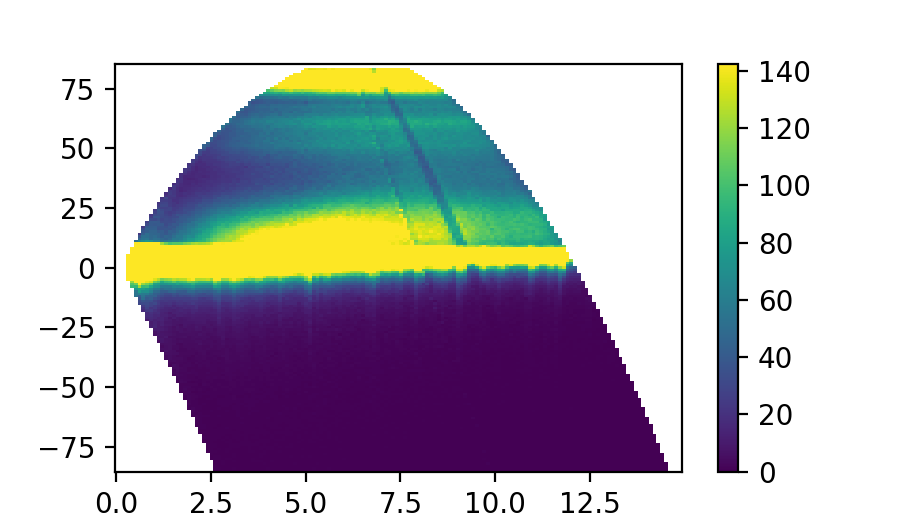

In [60]:
H.plot(iqe, min=0)

<IPython.core.display.Javascript object>


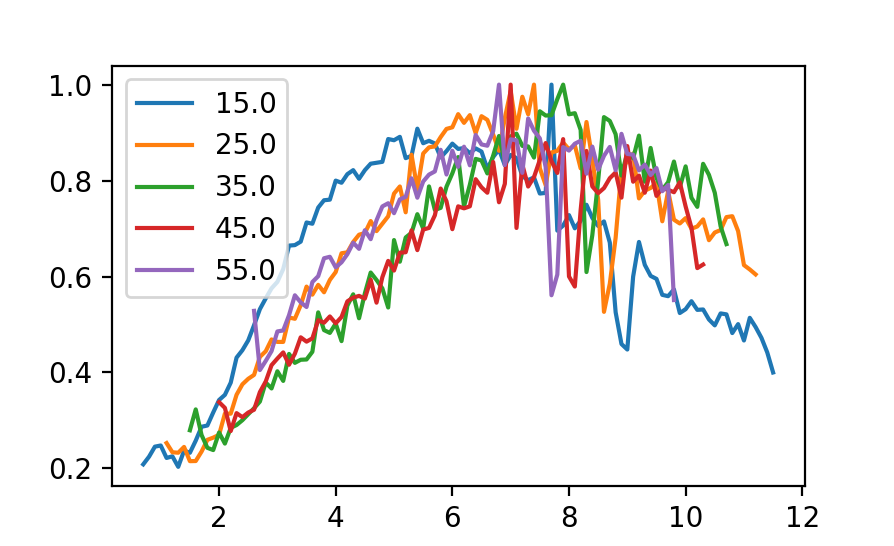

In [63]:
plt.figure()
for E in np.arange(15, 60, 10.):
    iq = iqe[(), E]
    norm = np.nanmax(iq.I)
    plt.plot(iq.Q, iq.I/norm, label=str(E))
plt.legend()

The Q behavior is quite different at lower E than higher E

# Let us try to fit the profile of I(Q) at high E

<IPython.core.display.Javascript object>


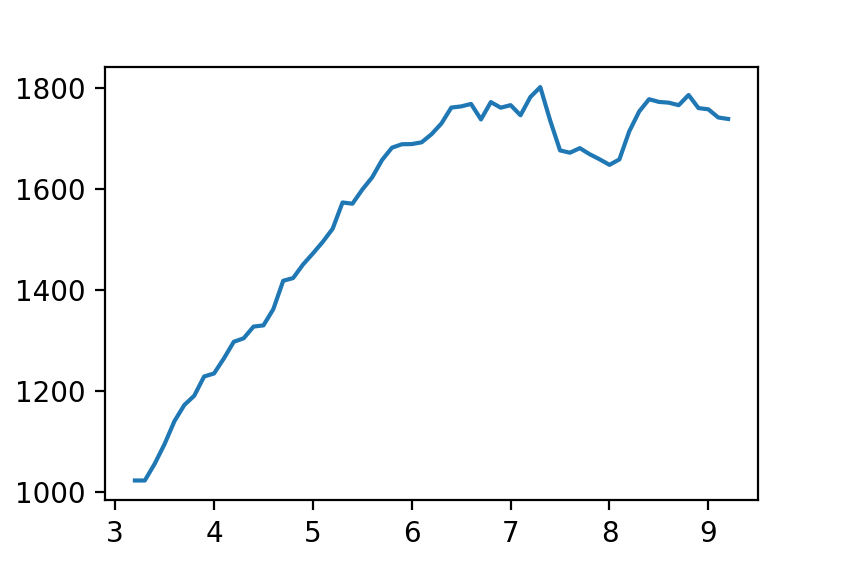

In [64]:
IQ_hE = iqe[(), (40.,65)].sum('E')
plt.figure()
plt.plot(IQ_hE.Q, IQ_hE.I)

In [65]:
x = IQ_hE.Q
y = IQ_hE.I

In [66]:
good = (x==x)*(y==y)

In [67]:
x = x[good]
y = y[good]

In [68]:
def f(q, A, B):
    return A*q*q*np.exp(-q*q*B)

In [69]:
import scipy.optimize as sopt

In [70]:
(A_opt, B_opt),_ = sopt.curve_fit(f, x, y, p0=(60, 1./36))

<IPython.core.display.Javascript object>


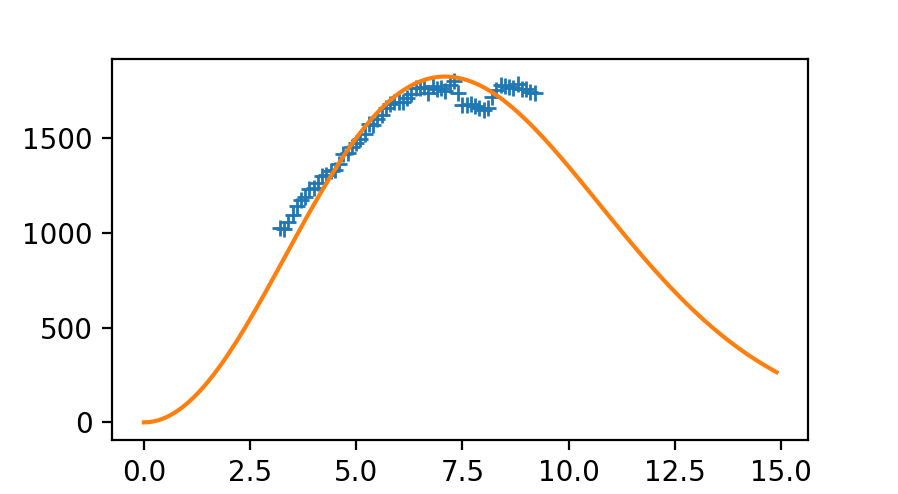

In [71]:
plt.figure()
plt.plot(IQ_hE.Q, IQ_hE.I, '+')
plt.plot(IQ_hE.Q, f(IQ_hE.Q, A_opt, B_opt))

In [39]:
A_opt, B_opt

(98.590011259197809, 0.019883456711439741)

# Now we do the same thing to the "model"

In [81]:
modelsqe = hh.load('work/round-2/sp-sqe.h5')

plot z in (0, 0.001)


<IPython.core.display.Javascript object>


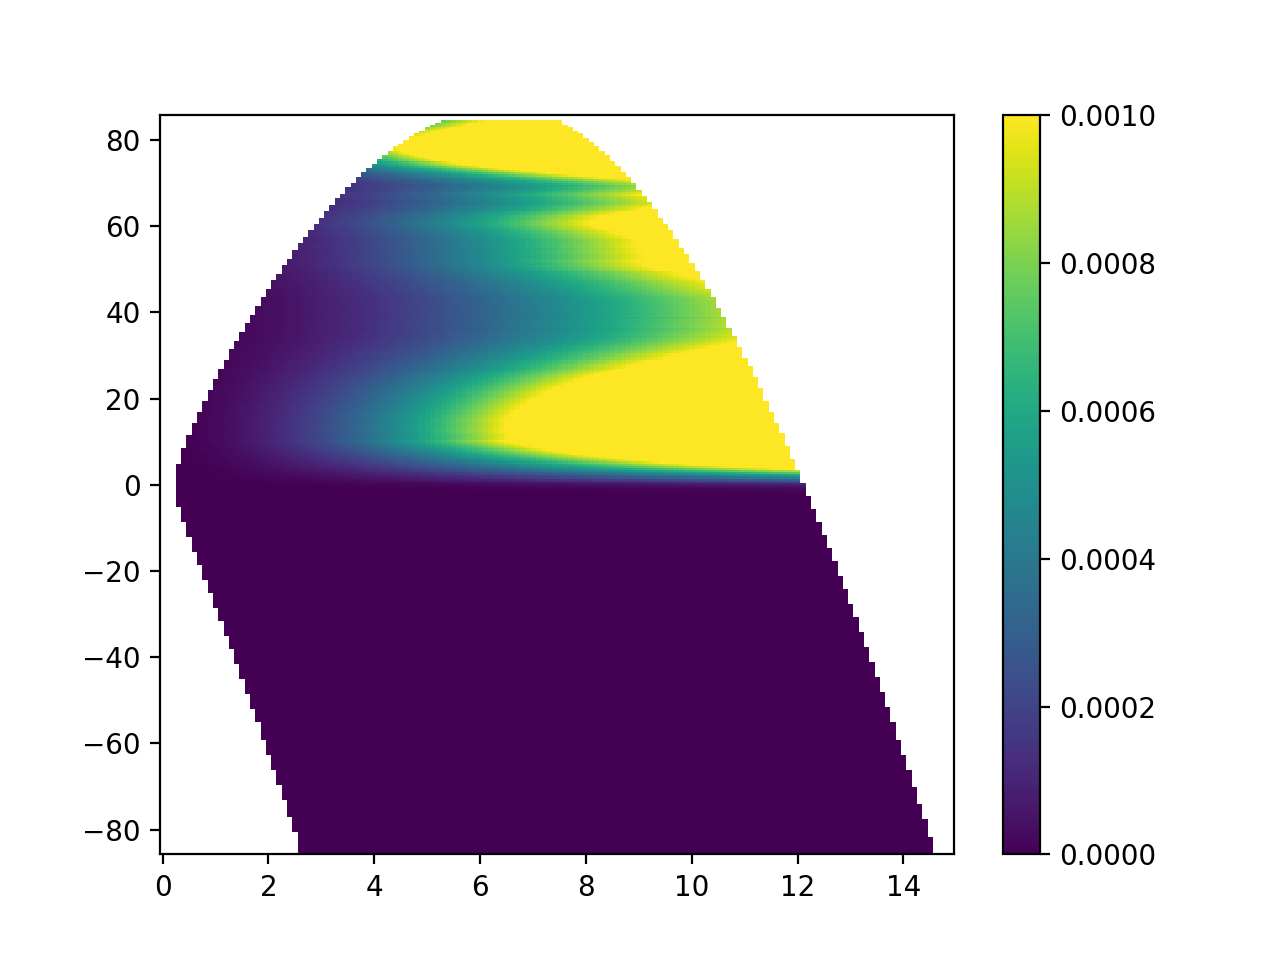

In [88]:
# plt.figure()
H.plot(modelsqe, min=0, max=.001)

In [90]:
%matplotlib notebook

<IPython.core.display.Javascript object>


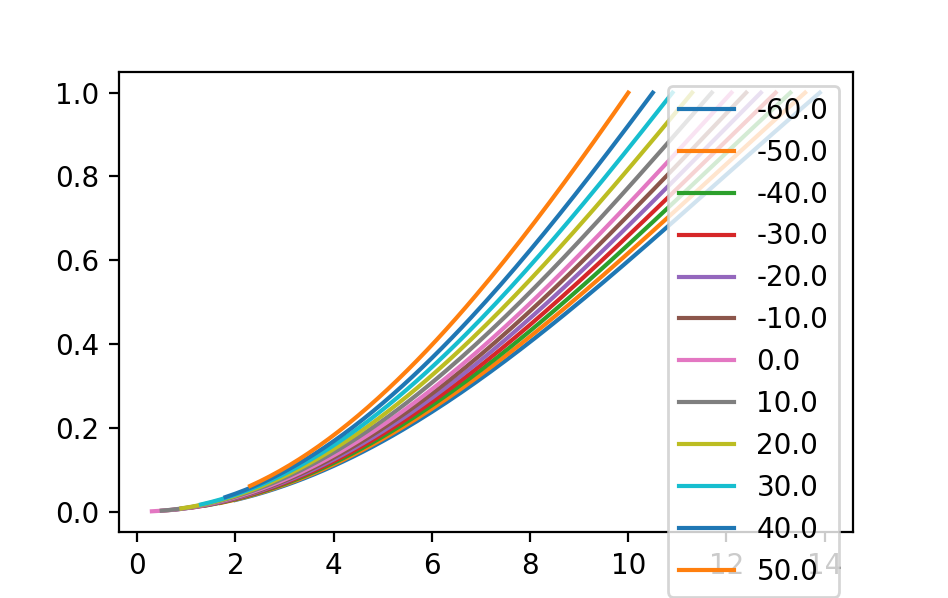

In [91]:
plt.figure()
for E in np.arange(-60, 60, 10.):
    iq = modelsqe[(), E]
    norm = np.nanmax(iq.I)
    plt.plot(iq.Q, iq.I/norm, label=str(E))
plt.legend()

In [92]:
IQ_p60 = modelsqe[(), -60]
x = IQ_p60.Q
y = IQ_p60.I
good = (x==x) * (y==y)
x = x[good]
y = y[good]

In [95]:
(A_opt, B_opt),_ = sopt.curve_fit(f, x, y, p0=(1, 1./1200))

<IPython.core.display.Javascript object>


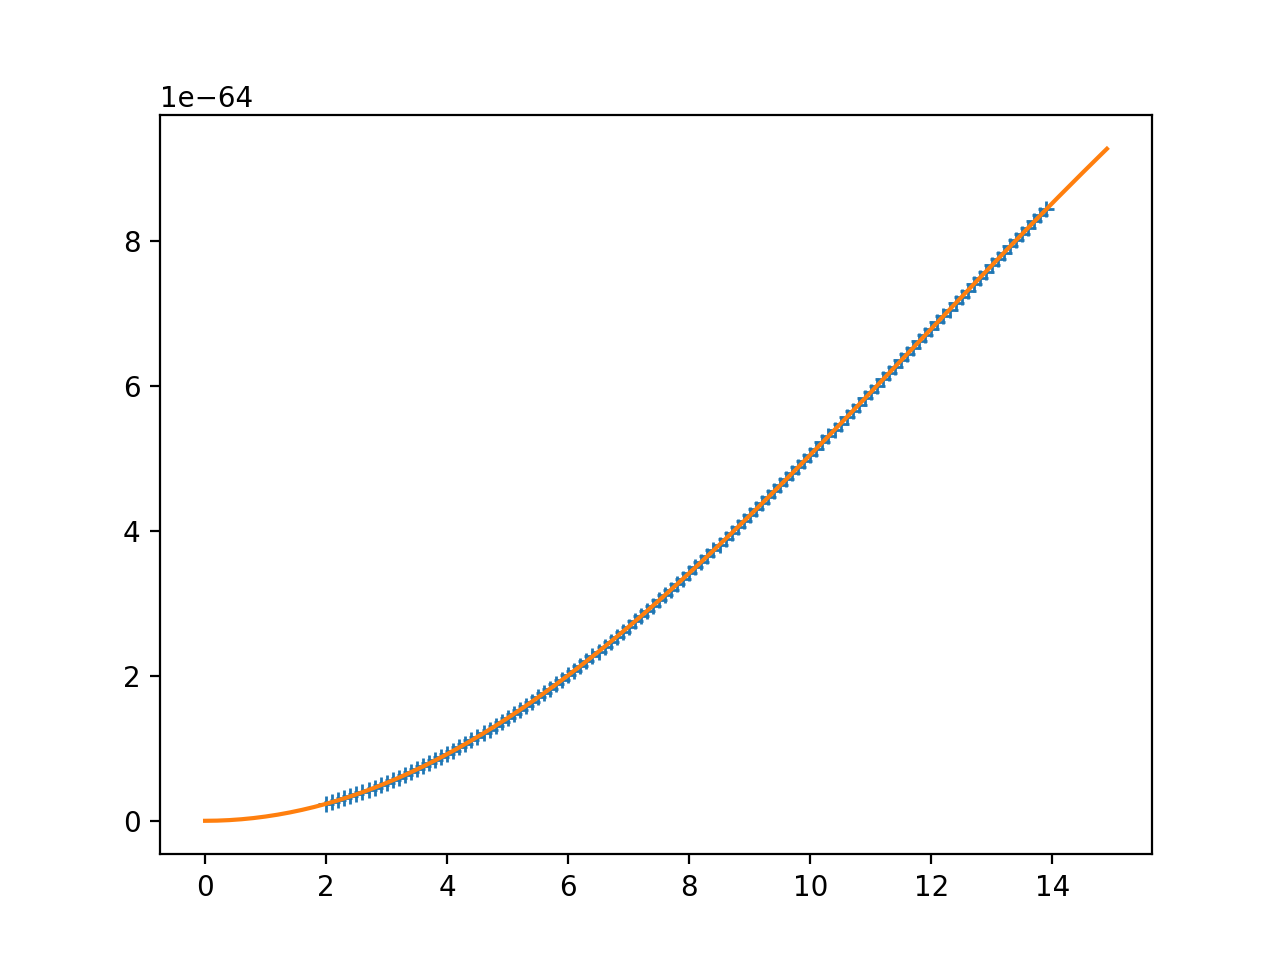

In [96]:
plt.figure()
plt.plot(IQ_p60.Q, IQ_p60.I, '+')
plt.plot(IQ_p60.Q, f(IQ_p60.Q, A_opt, B_opt))

In [97]:
B_opt

0.0015574731305256428

0.019883456711439741 from experiment

0.0015574731305256428 from model

It means there is something extra soft that is not caught in the model